# Company Overview

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. 
Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, 
and convenient!

# Problem Statement

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. 
Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# Solution Approach

- Data Exploration
    - UVA, BVA, MVA
- Hypothesis Test
    - Z Test / T Test
    - Chi square Test
    - Anova

## Detailed Breakdown

- Establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday, Weather, Season etc)
- Select an appropriate test to check whether:
    - Working Day has effect on number of electric cycles rented
    - No. of cycles rented similar or different in different seasons
    - No. of cycles rented similar or different in different weather
    - Weather is dependent on season (check between 2 predictor variable)
    - Holiday has effect on number of electric cycles rented
- Hypothesis Test Framework
    - Set up Null Hypothesis (H0)
    - State the alternate hypothesis (H1)
    - Check assumptions of the test (Normality, Equal Variance). 
    - Check using Histogram, Q-Q plot, statistical methods like levene’s test, Shapiro-wilk test
    - Set a significance level (alpha)
    - Calculate test Statistics and P value
    - Decision to accept or reject null hypothesis.
- Inference from the analysis

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, ttest_rel, ttest_ind, kstest, chi2, chi2_contingency, shapiro, kruskal, f_oneway, levene
from itertools import combinations

In [10]:
data = pd.read_csv(r'F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Yulu\Dataset\bike_sharing.csv')
# data = pd.read_csv(r'E:\Nextstep\Scaler\Business-Case-Study\Yulu\Dataset\bike_sharing.csv')

# EDA

In [4]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Inference:**
- Total: 12 Columns
- Target: 'count'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Inference:
- No null values in all the columns
- datetime column is not in datetime64 format, conversion required
- All are numerical columns, some may be binary (holiday, working day, weather, etc.,)

In [11]:
for i in ['season', 'holiday', 'workingday', 'weather']:
    print(i, ': ', data[i].unique())

season :  [1 2 3 4]
holiday :  [0 1]
workingday :  [0 1]
weather :  [1 2 3 4]


Inference:
- Holiday and Working day are binary columns
- Season and Weather are categorical with 4 categories

In [12]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
Inference:
- Holiday: 

In [15]:
data['datetime'].min(), data['datetime'].max()

('2011-01-01 00:00:00', '2012-12-19 23:00:00')

Inference: Dataset contains 2 years of data

# Preprocessing

In [12]:
data['date'] = pd.to_datetime(data['datetime']).dt.date
data['time'] = pd.to_datetime(data['datetime']).dt.time
data['day'] = pd.to_datetime(data['datetime']).dt.day_name()
data['year'] = pd.to_datetime(data['date']).dt.year
data['hour'] = pd.to_datetime(data['datetime']).dt.hour

# UVA

In [9]:
print('Total no. of days: ', data['date'].nunique())

Total no. of days:  456


<Axes: >

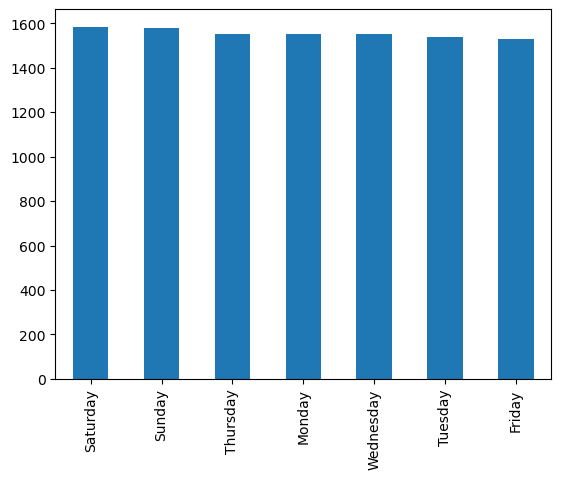

In [17]:
(pd.to_datetime(data['date']).dt.day_name().value_counts()).plot(kind='bar')

Inference:
- Above plot doesn't give any insight as it is a time series data from '2011-01-01 00:00:00', '2012-12-19 23:00:00' and it is recorded every 1 hour
- The univarite analysis on the given dataset gives the details about the conditions of the environment doesn't provides much insights to increase revenue

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime, Length: 10886, dtype: int64

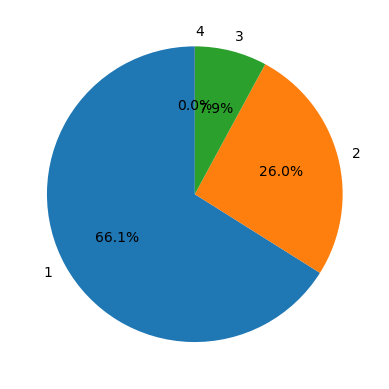

In [70]:
# data['weather'].plot(kind='pie')
plt.pie(data['weather'].value_counts(), labels = list(data['weather'].unique()), startangle = 90, autopct='%0.1f%%');

Inference:
- Weather 1 and 2 are predominant throughout the years
- Strategies involving weather 

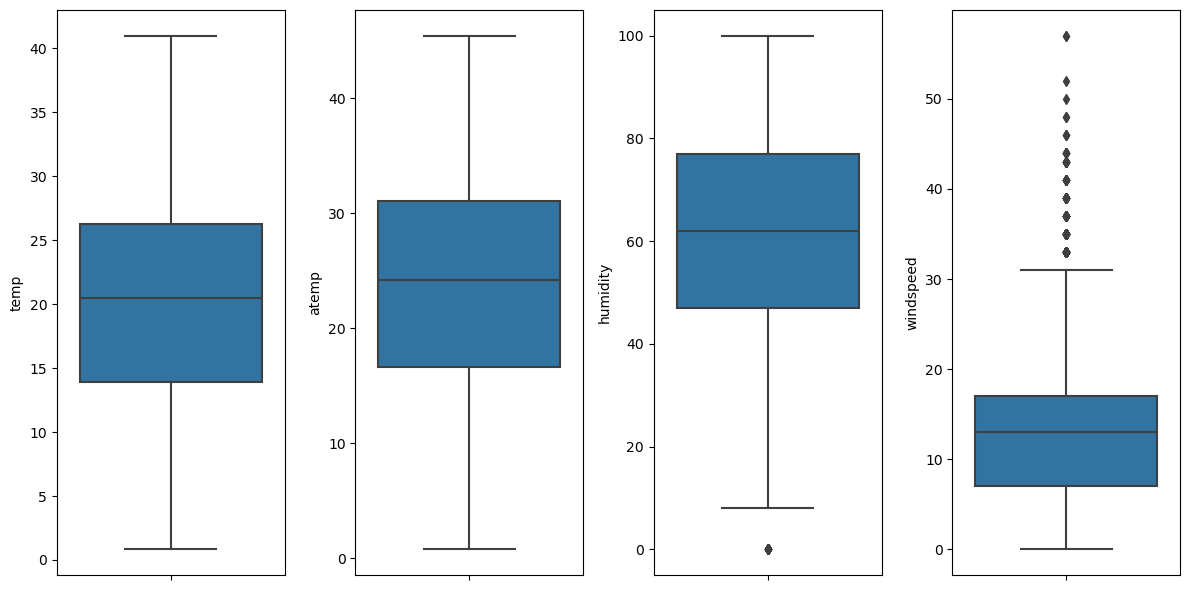

In [119]:
plt.figure(figsize=(12,6))
plt.subplot(1,4,1)
sns.boxplot(data=data, y = 'temp')
plt.subplot(1,4,2)
sns.boxplot(data=data, y = 'atemp')
plt.subplot(1,4,3)
sns.boxplot(data=data, y = 'humidity')
plt.subplot(1,4,4)
sns.boxplot(data=data, y = 'windspeed')
plt.tight_layout()

Inference:
- No IQR outliers in temperature, absolute temperature and humidity
- IQR outlier is detected for windspeed indicating the values > 30 rarely occurs
- Range: (Excluding outliers)
    - 0 < Temp < 40
    - 0 < aTemp < 45
    - 10 < Humidity < 100
    - 0 < windspeed < 30
- 

<Axes: xlabel='count', ylabel='Count'>

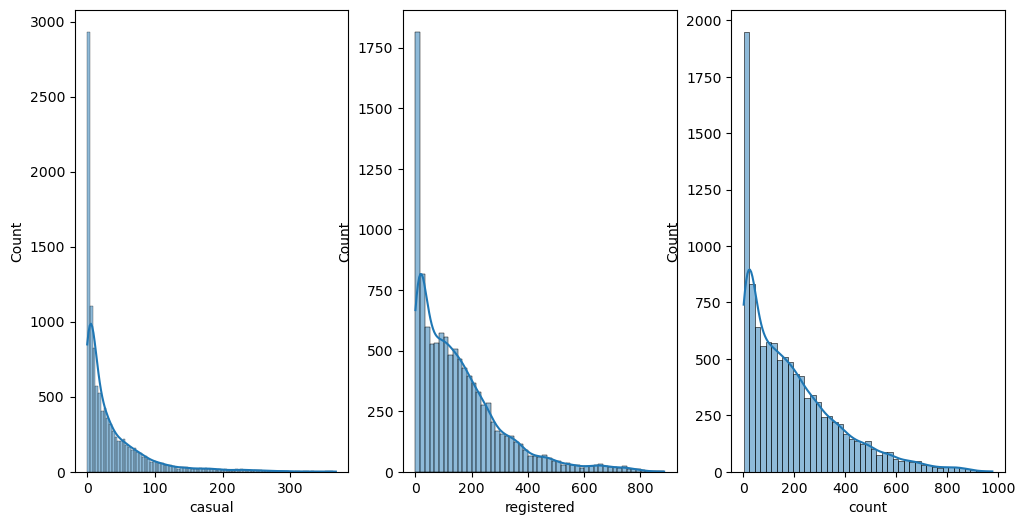

In [172]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.histplot(data['casual'], kde=True)
plt.subplot(1,3,2)
sns.histplot(data['registered'], kde=True)
plt.subplot(1,3,3)
sns.histplot(data['count'], kde=True)

Inference:
- Distribution of usage by casual users, registered users, overall users are all right skewed

# BVA

<Axes: xlabel='day'>

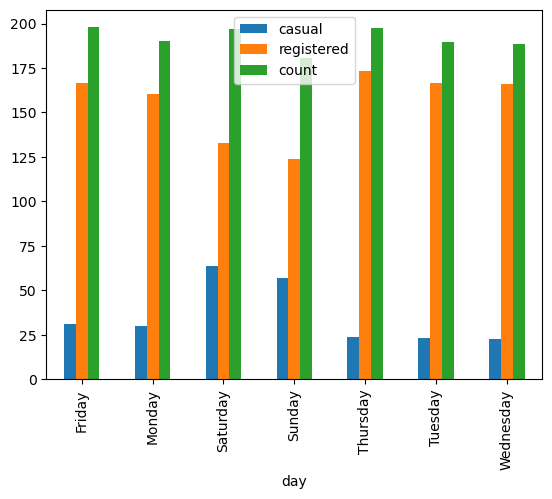

In [29]:
#Date Vs Count
data.groupby('day')[['casual', 'registered', 'count']].mean().plot(kind='bar')
#sns.barplot(data=data, x = 'day', y='casual', estimator='mean', hue='registered')

Inference:
- Casual users are comparativel very much higher on weekends and lesser on weedays
- Registered users are less during weekends
- Registered users are predominantly office goers or students
- Due to this behavior, the total count approximately remains constant throughout the days except Sunday
- It confirms the outside activity of the users are less on sunday
- Prediction of Casual users during weekends is very much required to optimize

<Axes: xlabel='year'>

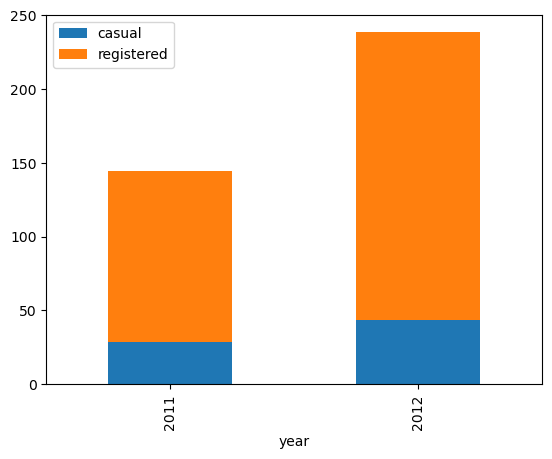

In [79]:
data.groupby('year')[['casual', 'registered']].mean().plot(kind='bar', stacked=True)

In [101]:
# YoY percentage increase
df_grp = data.groupby('year')[['casual', 'registered', 'count']].sum().pct_change() * 100
print('YoY increase of casual users: ', round(df_grp['casual'].iloc[1]), '%')
print('YoY increase of registered users: ', round(df_grp['registered'].iloc[1]), '%')
print('YoY increase of overall users: ', round(df_grp['count'].iloc[1]), '%')

YoY increase of casual users:  52 %
YoY increase of registered users:  70 %
YoY increase of overall users:  67 %


Inference:
- Average number of casual and registered users are increased in the year 2012 compared to 2011
- The percentage increase of users is measured to be 52, 70 and 67% for casual, registerd and overall users respectively

<Figure size 2000x1600 with 0 Axes>

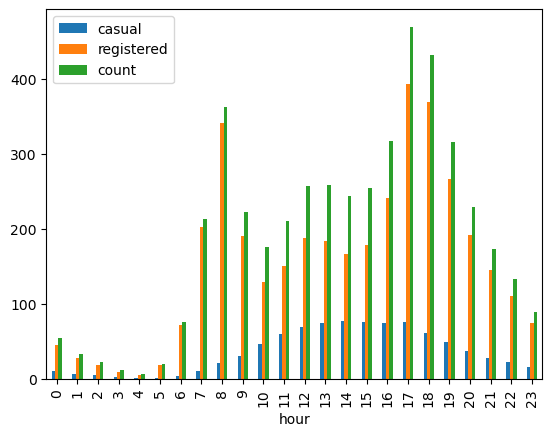

In [163]:
plt.figure(figsize=(12,6))
data.groupby('hour')[['casual', 'registered', 'count']].mean().plot(kind = 'bar')
plt.show()

Inference:
- Bell curve pattern is observed for casual users usage with time
- Average number of Casual users peaks between 13 - 17 hrs
- Double bell curve pattern is observed for registered users with time
- Registered users peak at 7-8 hrs at morning and 17-18 hrs at evening

<Axes: xlabel='year,season'>

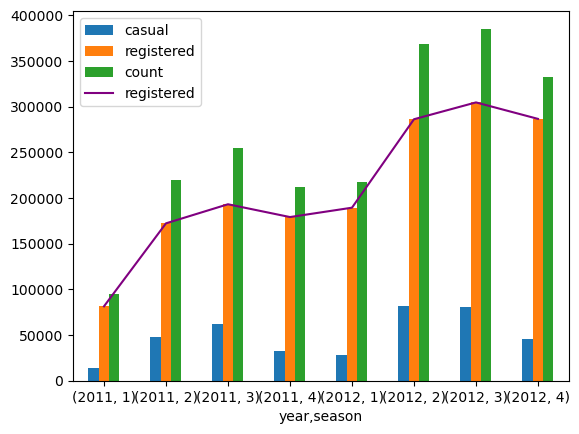

In [62]:
# Season Vs Count
ax = data.groupby(['year', 'season'])[['casual', 'registered', 'count']].sum().plot(kind='bar')
data.groupby(['year', 'season'])[['registered']].sum().plot(kind='line', ax=ax, color='purple')

Inference:
Analysing the 2 years of data separately, both years show
- Much higher trend in Fall followed by Summer and Winter
- Spring shows very much lesser trend 
- YoY increasing trend for Registered users is noticed which is responsible for the YoY increase in the count
- Concentrating on increasing the registered users would helpful to increase the revenue

In [35]:
data.groupby('season')['date'].nunique()

season
1    114
2    114
3    114
4    114
Name: date, dtype: int64

<Axes: ylabel='holiday'>

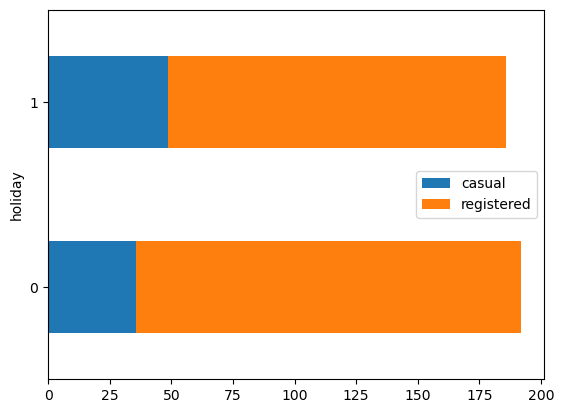

In [60]:
# Holiday vs Count
data.groupby(['holiday'])[['casual', 'registered']].mean().plot(kind='barh', stacked=True)

Inference:
- On Holidays, average number of casual users > average number of registered users

<Axes: ylabel='workingday'>

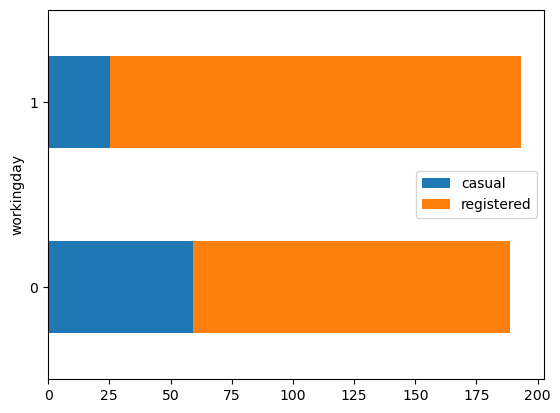

In [59]:
# Working day vs Count
data.groupby(['workingday'])[['casual', 'registered']].mean().plot(kind='barh', stacked=True)

Inference:
- On Working days, average number of registered users > average number of casual users

Text(0.5, 1.0, 'Usage based on weather')

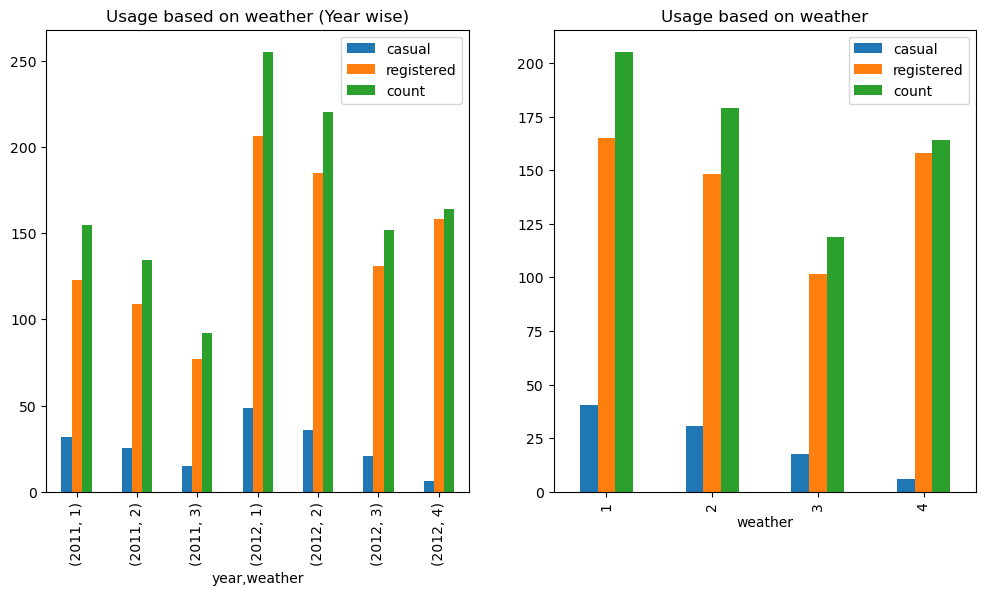

In [76]:
# Weather vs Count
# Weather corresponds to time not day
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
data.groupby(['year', 'weather'])[['casual', 'registered', 'count']].mean().plot(kind='bar', ax=ax)
plt.title('Usage based on weather (Year wise)')
ax = plt.subplot(1,2,2)
data.groupby(['weather'])[['casual', 'registered', 'count']].mean().plot(kind='bar', ax=ax)
plt.title('Usage based on weather')

Inference:
- The usage of bikes based on weather is in the order 1 > 2 > 4 > 3
- Interestingly the usage of bikes by registered users is high during Heavy rain climate than light rain, further analysis required
- The average number of usage increases between years 2011 and 2012

In [63]:
data.groupby(['year', 'weather'])['date'].nunique()

year  weather
2011  1          212
      2          166
      3           90
2012  1          222
      2          180
      3           97
      4            1
Name: date, dtype: int64

Inference:
- Strategies including weather 1 and 2 makes significant impact in the revenue than weather 3
- In the dataset, Weather 4 is used in only one record, the insight due to weather 4 doesn't make significant impact
    - The insight "the average usage of bikes by registered users is high during Heavy rain climate than light rain" cannot be concluded

In [64]:
data.groupby(['year', 'weather'])['date'].agg(['min', 'max'])

min         max
year weather                        
2011 1        2011-01-01  2011-12-19
     2        2011-01-01  2011-12-19
     3        2011-01-01  2011-12-17
2012 1        2012-01-01  2012-12-19
     2        2012-01-01  2012-12-18
     3        2012-01-01  2012-12-18
     4        2012-01-09  2012-01-09

In [ ]:
Inference:
- In the year 

In [ ]:
# Between Weather and Date

<Axes: xlabel='temp', ylabel='count'>

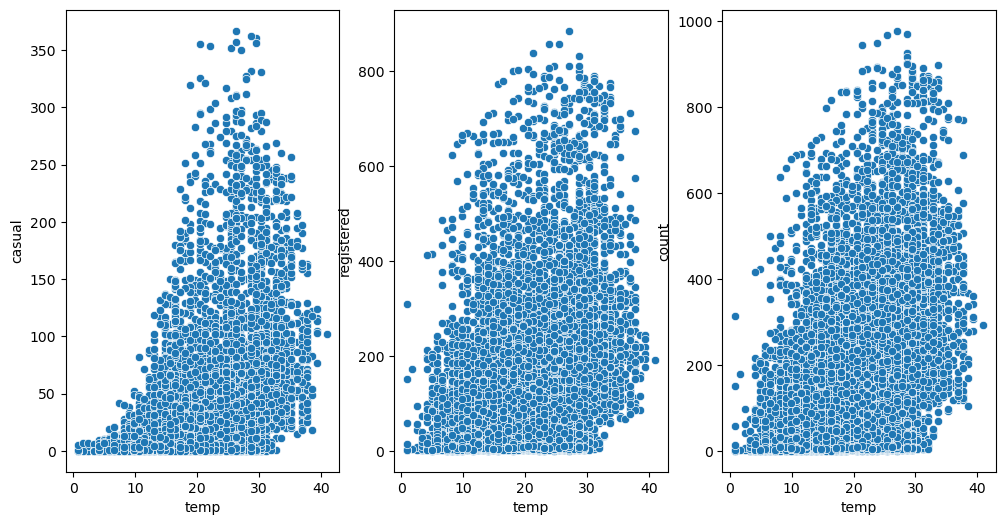

In [107]:
# Temp vs casual and registered
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.scatterplot(data=data, x = 'temp', y='casual')
plt.subplot(1,3,2)
sns.scatterplot(data=data, x = 'temp', y='registered')
plt.subplot(1,3,3)
sns.scatterplot(data=data, x = 'temp', y='count')

<Axes: xlabel='atemp', ylabel='count'>

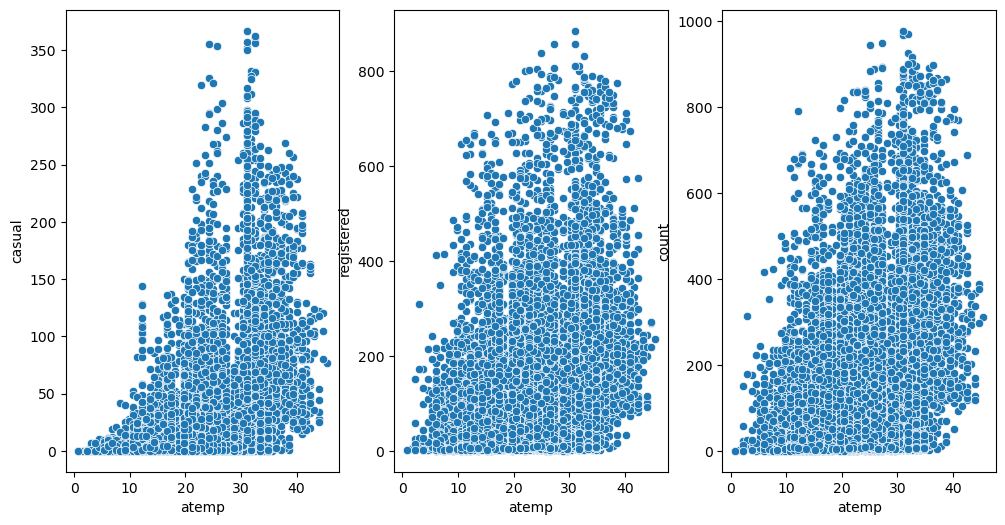

In [114]:
# aTemp vs casual and registered
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.scatterplot(data=data, x= 'atemp', y='casual')
plt.subplot(1,3,2)
sns.scatterplot(data=data, x = 'atemp', y='registered')
plt.subplot(1,3,3)
sns.scatterplot(data=data, x = 'atemp', y='count')

<Axes: xlabel='humidity', ylabel='count'>

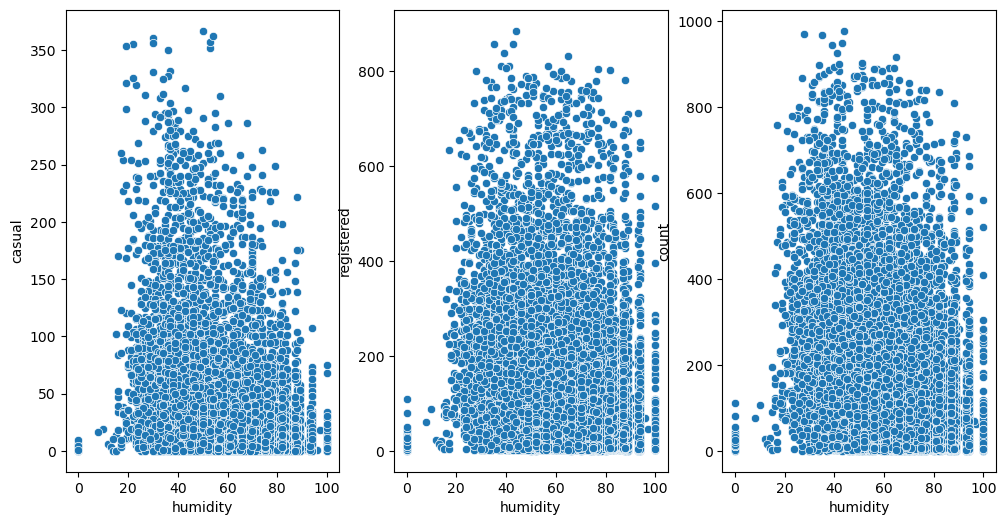

In [115]:
# Temp vs casual and registered
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.scatterplot(data=data, x = 'humidity', y='casual')
plt.subplot(1,3,2)
sns.scatterplot(data=data, x = 'humidity', y='registered')
plt.subplot(1,3,3)
sns.scatterplot(data=data, x = 'humidity', y='count')

<Axes: xlabel='windspeed', ylabel='count'>

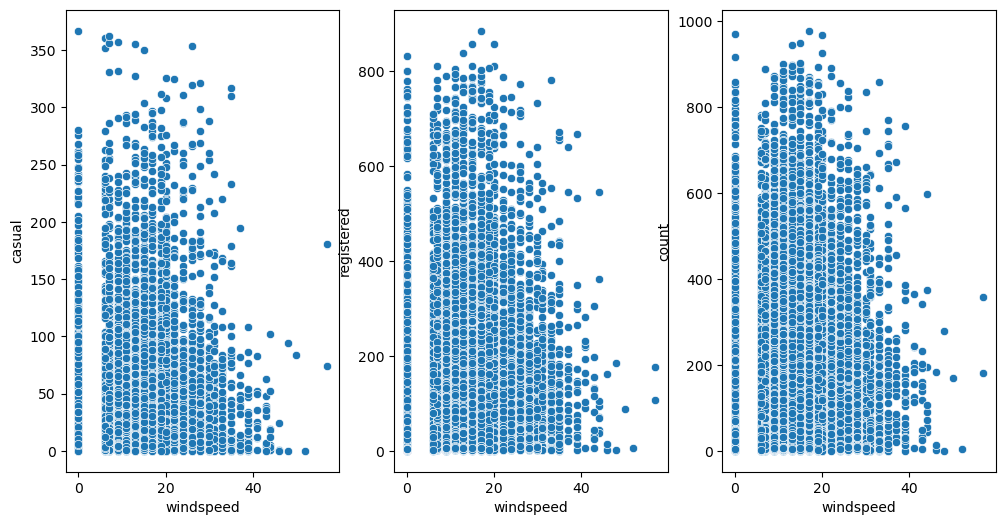

In [116]:
# Temp vs casual and registered
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.scatterplot(data=data, x = 'windspeed', y='casual')
plt.subplot(1,3,2)
sns.scatterplot(data=data, x = 'windspeed', y='registered')
plt.subplot(1,3,3)
sns.scatterplot(data=data, x = 'windspeed', y='count')

<Axes: xlabel='season', ylabel='temp'>

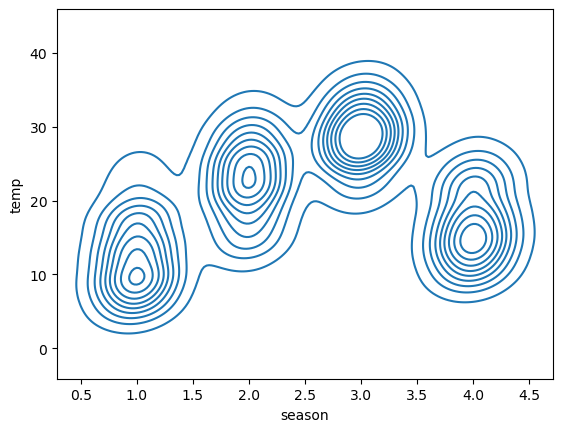

In [124]:
# Weather vs Temp
sns.kdeplot(data = data, x = 'season', y = 'temp')

# MVA

<Axes: xlabel='temp', ylabel='count'>

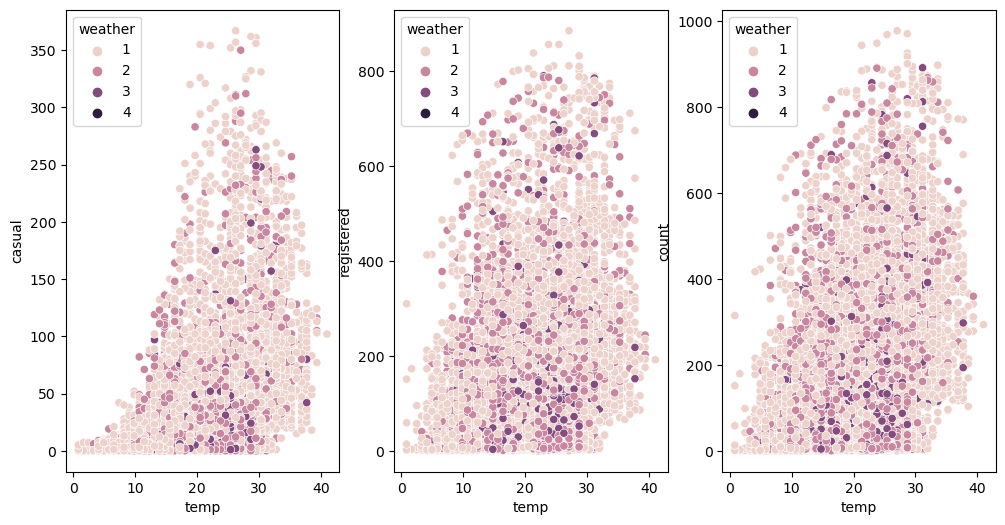

In [126]:
# Usage, Weather, 
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.scatterplot(data=data, x = 'temp', y='casual', hue = 'weather')
plt.subplot(1,3,2)
sns.scatterplot(data=data, x = 'temp', y='registered', hue = 'weather')
plt.subplot(1,3,3)
sns.scatterplot(data=data, x = 'temp', y='count', hue = 'weather')

<Axes: xlabel='temp', ylabel='count'>

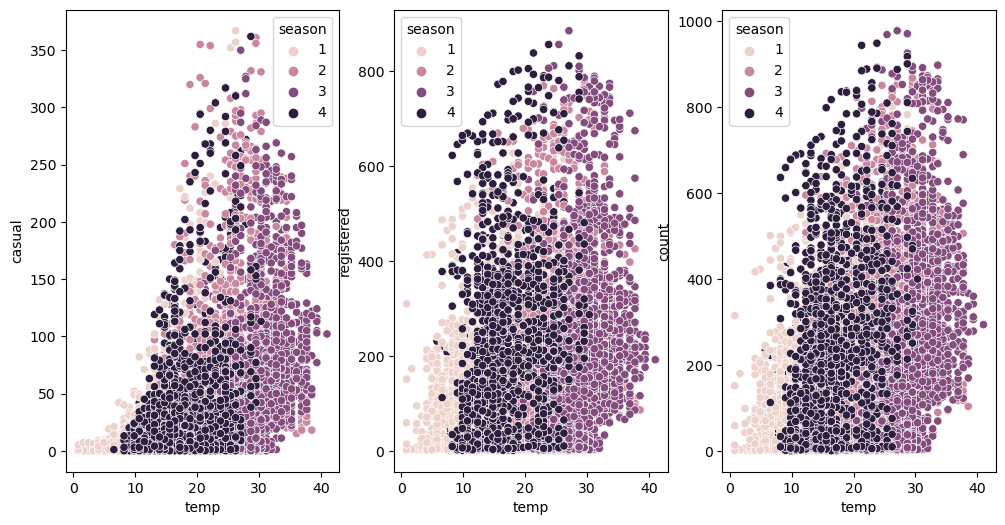

In [125]:
# Usage, Weather, 
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.scatterplot(data=data, x = 'temp', y='casual', hue = 'season')
plt.subplot(1,3,2)
sns.scatterplot(data=data, x = 'temp', y='registered', hue = 'season')
plt.subplot(1,3,3)
sns.scatterplot(data=data, x = 'temp', y='count', hue = 'season')

(array([1.313e+03, 4.083e+03, 2.827e+03, 1.540e+03, 6.960e+02, 2.800e+02,
        1.070e+02, 3.100e+01, 6.000e+00, 3.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <BarContainer object of 10 artists>)

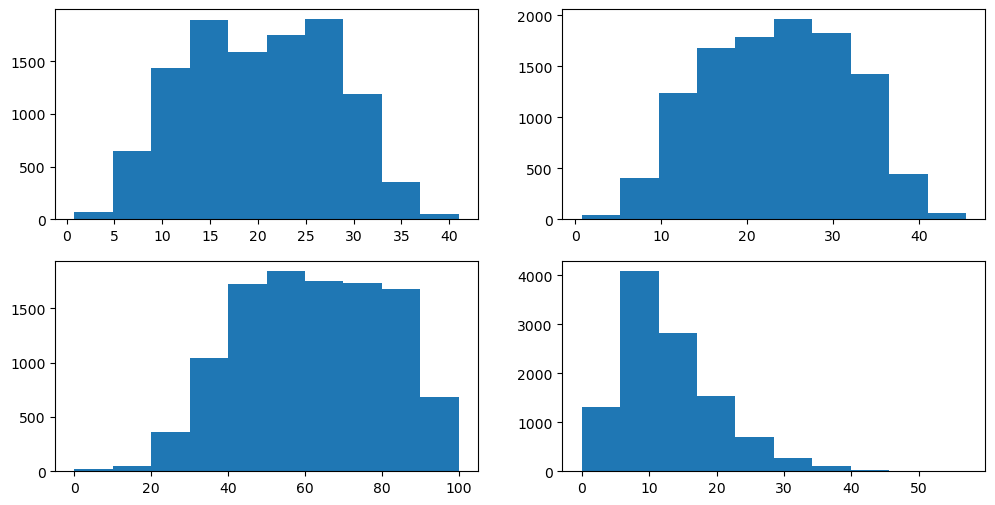

In [133]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.hist(data['temp'], bins = 10)
plt.subplot(2,2,2)
plt.hist(data['atemp'], bins = 10)
plt.subplot(2,2,3)
plt.hist(data['humidity'], bins = 10)
plt.subplot(2,2,4)
plt.hist(data['windspeed'], bins = 10)

# Numerical to Categorical Features
Temp:
    - Low: <15
    - Med: 15 - 30
    - High: >30
aTemp:
    - Low: <15
    - Med: 15 - 30
    - High: >30
Humidity:
    - Low: < 40
    - Med: 40 - 85
    - High: >85
windspeed:
    - Low: 0 - 10
    - Med: 11 - 25
    - High: >25

In [13]:
bins = [0, 15, 30, 50]
label = ['Low', 'Med', 'High']
data['temp_cat'] = pd.cut(data['temp'], bins=bins, labels=label)
data['temp_cat'].value_counts()

Med     6249
Low     3393
High    1244
Name: temp_cat, dtype: int64

<Axes: xlabel='temp_cat'>

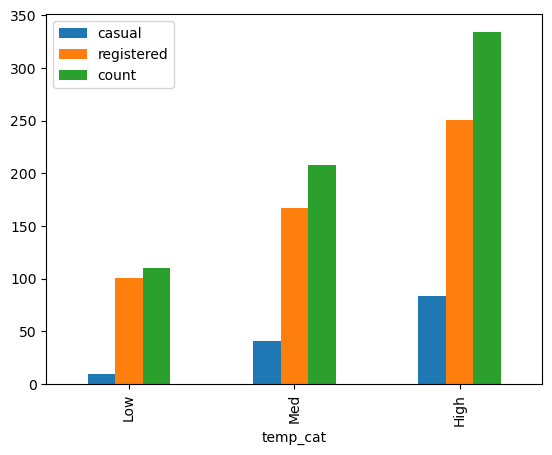

In [136]:
data.groupby('temp_cat')[['casual', 'registered', 'count']].mean().plot(kind='bar')

Inference:
- Average number of both casual and registered users increases with an increase in temperature
- It is evident that there is a linear relationship between the temperature and average number of users

In [14]:
bins = [0, 15, 30, 50]
label = ['Low', 'Med', 'High']
data['atemp_cat'] = pd.cut(data['atemp'], bins=bins, labels=label)
data['atemp_cat'].value_counts()

Med     5674
High    3250
Low     1962
Name: atemp_cat, dtype: int64

<Axes: xlabel='atemp_cat'>

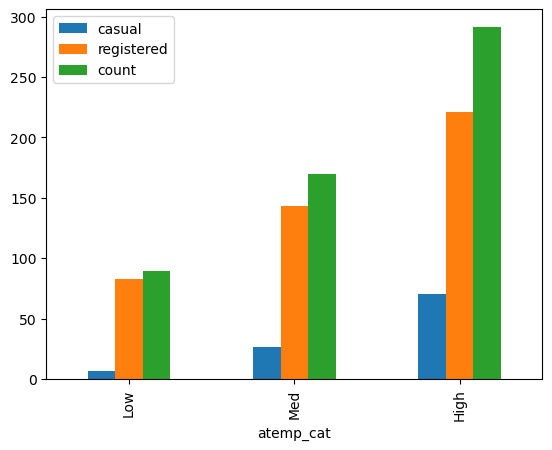

In [140]:
data.groupby('atemp_cat')[['casual', 'registered', 'count']].mean().plot(kind='bar')

Inference:
- Average number of both casual and registered users increases with an increase in absolute temperature
- It is evident that there is a linear relationship between the absolute temperature and average number of users

In [15]:
bins = [0, 40, 85, 100]
label = ['Low', 'Med', 'High']
data['humidity_cat'] = pd.cut(data['humidity'], bins=bins, labels=label)
data['humidity_cat'].value_counts()

Med     7715
Low     1616
High    1533
Name: humidity_cat, dtype: int64

<Axes: xlabel='humidity_cat'>

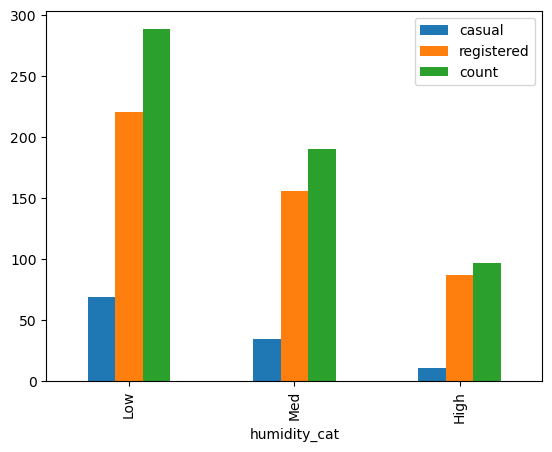

In [141]:
data.groupby('humidity_cat')[['casual', 'registered', 'count']].mean().plot(kind='bar')

Inference:
- Average number of both casual and registered users increases with the decrease in humidity level
- It is evident that the average number of users is negatively correlated with humidity

In [234]:
bins = [0, 10, 25, 100]
label = ['Low', 'Med', 'High']
data['windspeed_cat'] = pd.cut(data['windspeed'], bins=bins, labels=label)
data['windspeed_cat'].value_counts()

Med     5698
Low     3026
High     849
Name: windspeed_cat, dtype: int64

<Axes: xlabel='windspeed_cat'>

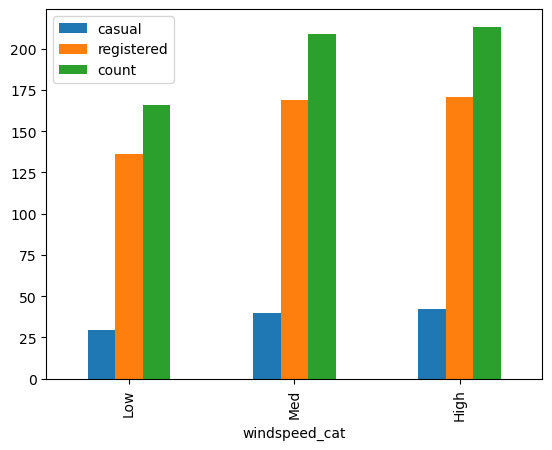

In [142]:
data.groupby('windspeed_cat')[['casual', 'registered', 'count']].mean().plot(kind='bar')

Inference:
- Average number of both casual and registered users slightly increases from low to medium windspeed
- No significant change in the average number of users between medium and high windspeed conditions

<Axes: >

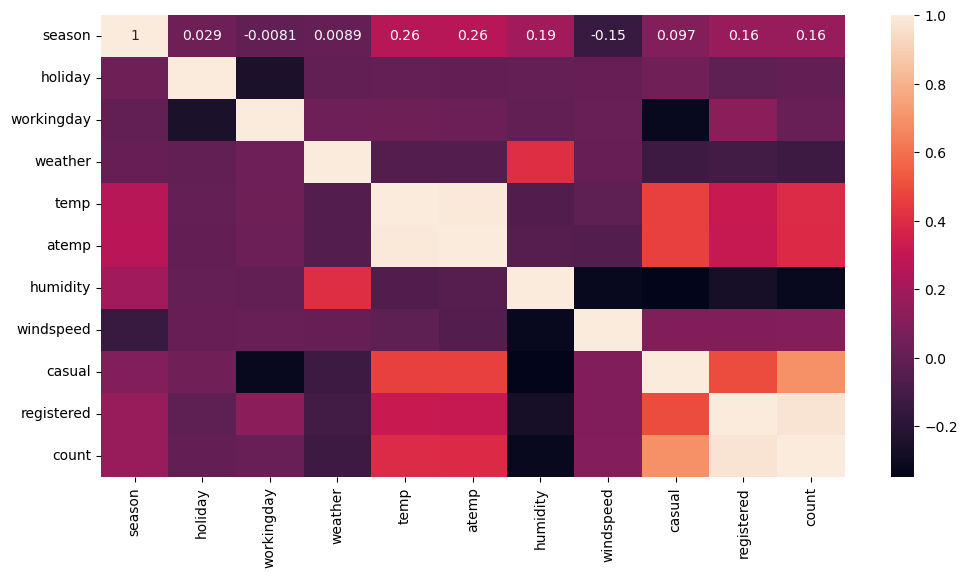

In [261]:
plt.figure(figsize=(12,6))
temp_data = data[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
sns.heatmap(temp_data.corr(), annot=True)

Inference:
- Average number of casual and registered users are highly positively correlated with temp, atemp
- Humidity and weather are positively correlated
- Humidity and windspeed are negatively correlated
- Average number of causal users is negatively correlated with working day


In [164]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'time', 'day', 'year', 'temp_cat', 'atemp_cat', 'humidity_cat',
       'windspeed_cat', 'hour'],
      dtype='object')

# Hypothesis Tests

### 1. Problem Statement

Working Day has effect on number of electric cycles rented

***Solution Approach:***
- Null Hypothesis: **u1=u2**
- Alternate Hypothesis: **u1>u2**
    - u1 - Average no. of cycles rented during working day
    - u2 - Average no. of cycles rented during non working day
- Significance level: 5%
- Comparison between Average no. of cycles rented (*Numerical*) and working day (*Category with 2 categories*)
- **Normality Test**
    - Check for Average no. of cycles rented follow Normal distribution
- Hence, **2 Sample T Test**

In [194]:
def check_normality(samples):
    for i in range(len(samples)):
        stat, p_value = shapiro(samples[i])
        if p_value < 0.05:
            print("Reject Null Hypothesis. Pval is ", p_value ,". Hence, Sample", str(i+1), " doesn't follow normal distribution")
        else:
            print("Fail to Reject Null Hypothesis. Pval is ", round(p_value,2) ,". Hence, Sample", str(i+1), " follows normal distribution")

In [195]:
def plot_dist(samples):
    plt.figure(figsize=(12,6))
    for i in range(len(samples)):
        plt.subplot(1, len(samples), i+1)
        sns.kdeplot(samples[i])
        plt.title('Sample ' + str(i+1))

In [ ]:
df = data.groupby('date').agg({'workingday': 'min', 'count': 'mean'})
sample1 = df[df['workingday'] == 1]['count']
sample2 = df[df['workingday'] != 1]['count']

#### 1.1 Check For Assumptions

In [26]:
check_normality([sample1, sample2])

Reject Null Hypothesis. Pval is  0.0 . Hence, Sample 1  doesn't follow normal distribution
Fail to Reject Null Hypothesis. Pval is  0.08 . Hence, Sample 2  follows normal distribution


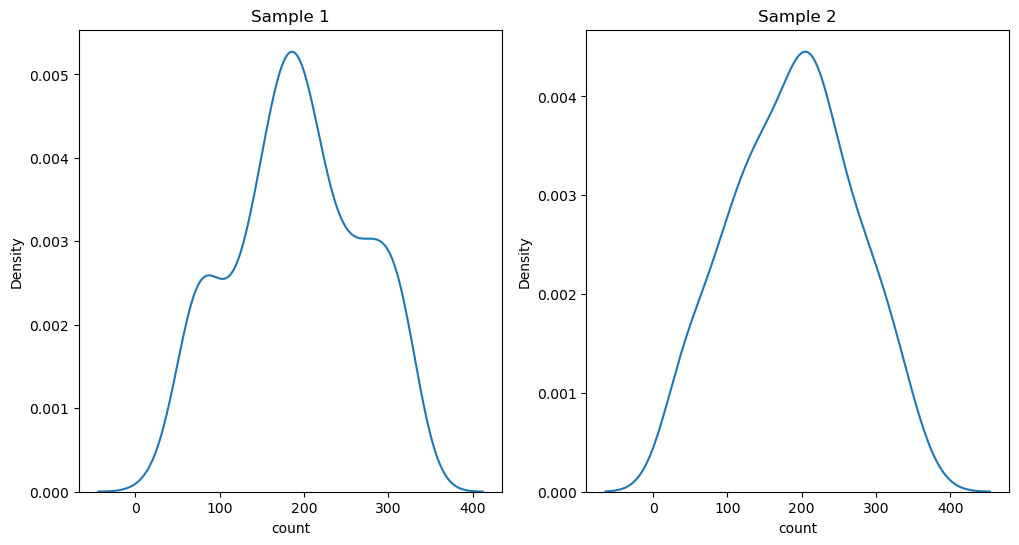

In [60]:
plot_dist([sample1, sample2])

Inference:
- Average no. of cycles rented during non-working day follows normal distribution 
- Average no. of cycles rented during working day doesn't follow normal distribution
- Distribution plot and QQ Plot confirms the above point

#### 1.2. Perform T-Test

In [ ]:
def TTest(sample1, sample2, )


In [181]:
alpha = 0.05
print('Sample-1 Mean: ', round(sample1.mean(),2), 'Sample-2 Mean: ', round(sample2.mean(),2))
tstat, p_value = ttest_ind(sample1, sample2, alternative='greater')
print('T-Stat: ', round(tstat,2), 'P-Val: ', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis. Hence, Average number of cycles rented during working day is greater than non working day')
else:
    print('Fail to Reject Null Hypothesis. Hence, Average number of cycles rented during working day is equal to non working day')

Sample-1 Mean:  192.28 Sample-2 Mean:  188.33
T-Stat:  0.51 P-Val:  0.31
Fail to Reject Null Hypothesis. Hence, Average number of cycles rented during working day is equal to non working day


Inference:
- Since the test is between a numerical and categorical variable (with 2 categories), **2 sample t-test is selected**
- Alterate hypothesis is choosen as u1>u2 instead of u1<>u2
- Fail to Reject Null Hypothesis. Hence, **Average number of cycles rented during working day is equal to non working day**

### 2. Problem Statement

No. of cycles rented similar or different in different seasons

***Solution Approach:***
- Null Hypothesis: **Average no. of cycles rented are equal for all seasons**
- Alternate Hypothesis: **Average no. of cycles rented is different for atleast one season**
- Comparison between Average no. of cycles rented (*Numerical*) and Seasons (*Category with 4 categories*)
- **Normality Test**
    - Check for Average no. of cycles rented follow Normal distribution
    - **Shapiro Test**
- **Variance Test**
    - Check for Homogeneity of variances
    - **Levene Test**
- **One Way ANOVA Test**
- Significance level: 5%

In [40]:
count_season = []
for i in range(1, data['season'].nunique()+1):
    count_season.append(list(data[data['season'] == i]['count']))

#### 2.1. Check for Assumptions

In [44]:
check_normality(count_season)

Reject Null Hypothesis. Pval is  0.0 . Hence, Sample 1  doesn't follow normal distribution
Reject Null Hypothesis. Pval is  6.039093315091269e-39 . Hence, Sample 2  doesn't follow normal distribution
Reject Null Hypothesis. Pval is  1.043458045587339e-36 . Hence, Sample 3  doesn't follow normal distribution
Reject Null Hypothesis. Pval is  1.1301682309549298e-39 . Hence, Sample 4  doesn't follow normal distribution


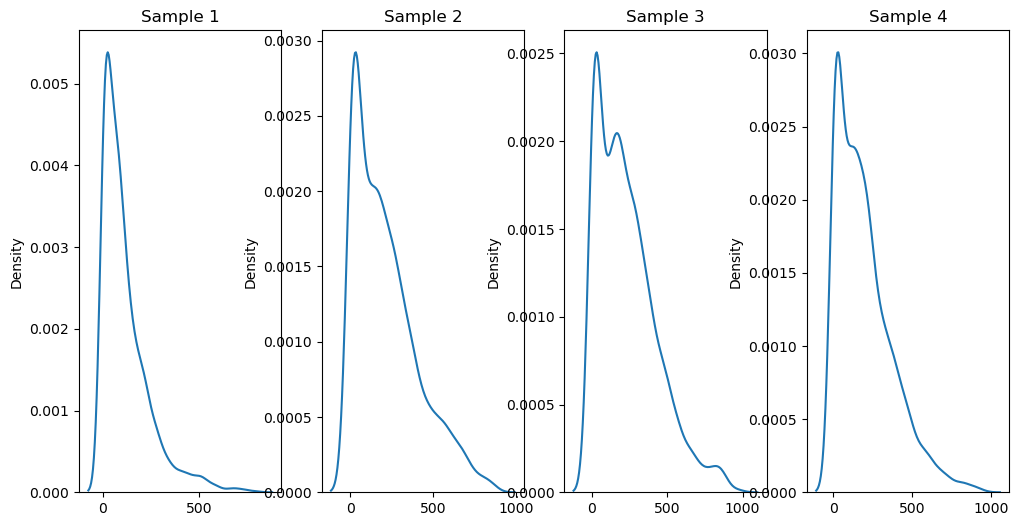

In [58]:
plot_dist(count_season)

In [67]:
def Check_Variances(samples):
    stat, p_value = levene(samples[0], samples[1], samples[2], samples[3])
    if p_value < 0.05:
        print("Reject Null Hypothesis. Pval is ", p_value ,". Hence, the variance of atleast one sample is significantly different")
    else:
        print("Fail to Reject Null Hypothesis. Pval is ", round(p_value,2) ,". Hence, the variances are relatively equal across the samples")

In [68]:
Check_Variances(count_season)

Reject Null Hypothesis. Pval is  1.0147116860043298e-118 . Hence, the variance of atleast one sample is significantly different


Inference:
- For Anova, the assumptions are failed Normal distribution of sample data and homogeneity of variances
- Perform Anova and also try Kruskal wallis test

#### 2.2. Perform One Way Anova Test

In [86]:
# One Way Anova
alpha = 0.05
stat, p_value = f_oneway(count_season[0], count_season[1], count_season[2], count_season[3])
#print('Sample-1 Mean: ', round(sample1.mean(),2), 'Sample-2 Mean: ', round(sample2.mean(),2))
print('Test Statistic: ', round(stat,2), 'P-Val: ', p_value)
if p_value < alpha:
    print('Reject Null Hypothesis. Hence, Average no. of cycles rented is different for atleast one season')
else:
    print('Fail to Reject Null Hypothesis. Hence, Average no. of cycles rented is equal for all seasons')

Test Statistic:  236.95 P-Val:  6.164843386499654e-149
Reject Null Hypothesis. Hence, Average no. of cycles rented is different for atleast one season


Inference:
- One way Anova test concluded that Average number of cycles rented is significantly different for atleast one season
- In order the find the seasons where the Average number of cycles rented is significantly different we need to perform 2 sample t test

#### 2.3. Perform Kruskal Wallis Test

In [73]:
# Kruskal Wallis Test
alpha = 0.05
stat, p_value = kruskal(count_season[0], count_season[1], count_season[2], count_season[3])
#print('Sample-1 Mean: ', round(sample1.mean(),2), 'Sample-2 Mean: ', round(sample2.mean(),2))
print('Test Statistic: ', round(stat,2), 'P-Val: ', p_value)
if p_value < alpha:
    print('Reject Null Hypothesis. Hence, Median no. of cycles rented is different for atleast one season')
else:
    print('Fail to Reject Null Hypothesis. Hence, Median no. of cycles rented is equal for all seasons')

Test Statistic:  699.67 P-Val:  2.479008372608633e-151
Reject Null Hypothesis. Hence, Median no. of cycles rented is different for atleast one season


Inference:
- Since the assumptions of one way anova test is not met, the results can not concluded directly from that test
- Kruskal wallis test, concludes that the Median no. of cycles rented is different for atleast one season

#### 2.4. Perform 2 Sample T Test between dependent and each independent variable

In [97]:
alpha = 0.05
for sample in count_season:
    print('Average no. of cycles rented in season ', str(i), ': ', np.mean(sample))

for idx1, idx2 in list(combinations(np.arange(len(count_season)),2)):
    tstat, p_value = ttest_ind(count_season[idx1], count_season[idx2], alternative='two-sided')
    print('T-Stat: ', round(tstat,2), 'P-Val: ', p_value)
    if p_value < 0.05:
        print('Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between seasons', str(idx1), ' and ', str(idx2))
    else:
        print('Fail to Reject Null Hypothesis. Hence, Average number of cycles rented is equal between seasons', str(idx1), ' and ', str(idx2))

Average no. of cycles rented in season  4 :  116.34326135517499
Average no. of cycles rented in season  4 :  215.25137211855105
Average no. of cycles rented in season  4 :  234.417124039517
Average no. of cycles rented in season  4 :  198.98829553767374
T-Stat:  -22.42 P-Val:  1.6578587340400098e-106
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between seasons 0  and  1
T-Stat:  -26.26 P-Val:  3.4038504355310974e-143
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between seasons 0  and  2
T-Stat:  -19.76 P-Val:  5.236417429066781e-84
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between seasons 0  and  3
T-Stat:  -3.64 P-Val:  0.00027431561172498644
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between seasons 1  and  2
T-Stat:  3.25 P-Val:  0.001157968169413171
Reject Null Hypothesis. Hence, Average number of cy

Inference:
- Average number of cycles rented is significantly different between each seasons

### 3. Problem Statement

No. of cycles rented similar or different in different weather

***Solution Approach:***
- Null Hypothesis: **Average no. of cycles rented are equal for all weather conditions**
- Alternate Hypothesis: **Average no. of cycles rented is different for atleast one weather**
- Comparison between Average no. of cycles rented (*Numerical*) and Weather (*Category with 4 categories*)
- **Normality Test**
    - Check for Average no. of cycles rented follow Normal distribution
    - **Shapiro Test**
- **Variance Test**
    - Check for Homogeneity of variances
    - **Levene Test**
- **One Way ANOVA Test**
- Significance level: 5%

In [101]:
count_weather = []
for i in range(1, data['weather'].nunique()): # Ignoting weather 4 as it is present in one sample
    count_weather.append(list(data[data['weather'] == i]['count']))

#### 3.1. Check for Assumptions

In [102]:
check_normality(count_weather)

Reject Null Hypothesis. Pval is  0.0 . Hence, Sample 1  doesn't follow normal distribution
Reject Null Hypothesis. Pval is  9.781063280987223e-43 . Hence, Sample 2  doesn't follow normal distribution
Reject Null Hypothesis. Pval is  3.876090133422781e-33 . Hence, Sample 3  doesn't follow normal distribution


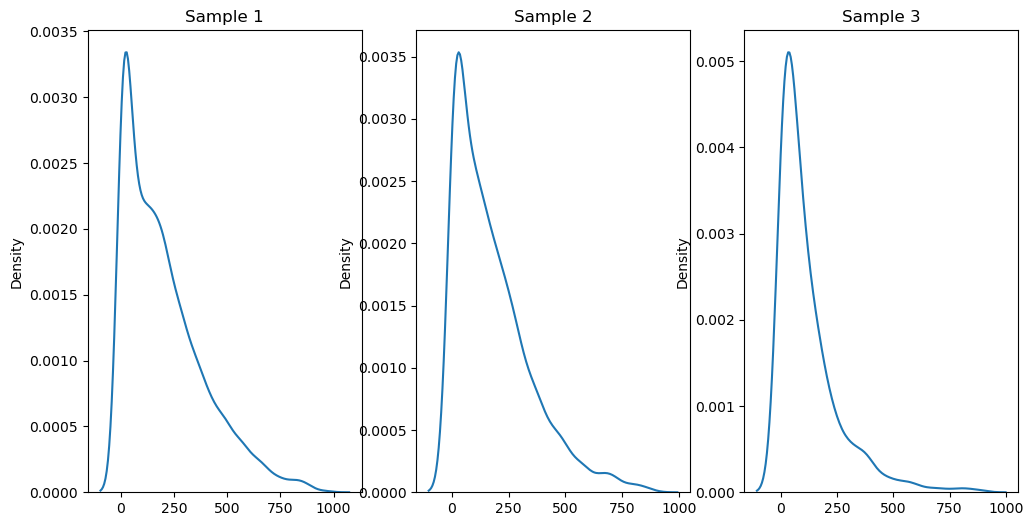

In [103]:
plot_dist(count_weather)

In [105]:
stat, p_value = levene(count_weather[0], count_weather[1], count_weather[2])
if p_value < 0.05:
    print("Reject Null Hypothesis. Pval is ", p_value ,". Hence, the variance of atleast one sample is significantly different")
else:
    print("Fail to Reject Null Hypothesis. Pval is ", round(p_value,2) ,". Hence, the variances are relatively equal across the samples")

Reject Null Hypothesis. Pval is  6.198278710731511e-36 . Hence, the variance of atleast one sample is significantly different


Inference:
- For Anova, the assumptions such as Normal distribution of sample data and homogeneity of variances of sample data are failed
- Perform Anova and also try Kruskal wallis test

#### 3.2. Perform One Way Anova Test

In [107]:
# One Way Anova
alpha = 0.05
stat, p_value = f_oneway(count_weather[0], count_weather[1], count_weather[2])
#print('Sample-1 Mean: ', round(sample1.mean(),2), 'Sample-2 Mean: ', round(sample2.mean(),2))
print('Test Statistic: ', round(stat,2), 'P-Val: ', p_value)
if p_value < alpha:
    print('Reject Null Hypothesis. Hence, Average no. of cycles rented is different for atleast one weather')
else:
    print('Fail to Reject Null Hypothesis. Hence, Average no. of cycles rented is equal for all weather conditions')

Test Statistic:  98.28 P-Val:  4.976448509904196e-43
Reject Null Hypothesis. Hence, Average no. of cycles rented is different for atleast one weather


Inference:
- One way Anova test concluded that Average number of cycles rented is significantly different for atleast one weather
- In order the find the weather condition at which the Average number of cycles rented is significantly different we need to perform 2 sample t test

#### 3.3. Perform Kruskal Wallis Test

In [108]:
# Kruskal Wallis Test
alpha = 0.05
stat, p_value = kruskal(count_weather[0], count_weather[1], count_weather[2])
#print('Sample-1 Mean: ', round(sample1.mean(),2), 'Sample-2 Mean: ', round(sample2.mean(),2))
print('Test Statistic: ', round(stat,2), 'P-Val: ', p_value)
if p_value < alpha:
    print('Reject Null Hypothesis. Hence, Median no. of cycles rented is different for atleast one weather')
else:
    print('Fail to Reject Null Hypothesis. Hence, Median no. of cycles rented is equal for all weather conditions')

Test Statistic:  204.96 P-Val:  3.122066178659941e-45
Reject Null Hypothesis. Hence, Median no. of cycles rented is different for atleast one weather


Inference:
- Since the assumptions of one way anova test is not met, the results can not concluded directly from that test
- Kruskal wallis test, concludes that the Median no. of cycles rented is different for atleast one weather conditions

#### 3.4. Perform 2 Sample T Test between dependent and each independent variable

In [109]:
alpha = 0.05
for sample in count_weather:
    print('Average no. of cycles rented in season ', str(i), ': ', np.mean(sample))

for idx1, idx2 in list(combinations(np.arange(len(count_weather)),2)):
    tstat, p_value = ttest_ind(count_weather[idx1], count_weather[idx2], alternative='two-sided')
    print('T-Stat: ', round(tstat,2), 'P-Val: ', p_value)
    if p_value < 0.05:
        print('Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between weather', str(idx1), ' and ', str(idx2))
    else:
        print('Fail to Reject Null Hypothesis. Hence, Average number of cycles rented is equal between weather', str(idx1), ' and ', str(idx2))

Average no. of cycles rented in season  3 :  205.23679087875416
Average no. of cycles rented in season  3 :  178.95553987297106
Average no. of cycles rented in season  3 :  118.84633294528521
T-Stat:  6.49 P-Val:  9.098916216508542e-11
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between seasons 0  and  1
T-Stat:  13.05 P-Val:  1.4918709771846279e-38
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between seasons 0  and  2
T-Stat:  9.53 P-Val:  2.7459673190273646e-21
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between seasons 1  and  2


Inference:
- Average number of cycles rented is significantly different between each weather conditions

### 4. Problem Statement

Is Weather dependent on Season ?

***Solution Approach:***
- Null Hypothesis: **Weather and Season are independent**
- Alternate Hypothesis: **Weather and Season are not independent**
- Comparison between Season (*Category with 4 categories*) and Weather (*Category with 4 categories*)
- **Chi Square Contingency Test**
- Significance level: 5%

In [ ]:
def chi_test(ds1, ds2, alpha):
    df_conti = pd.crosstab(ds1, ds2)
    stat, p_value, dof, exp = chi2_contingency(df_conti)
    if p_value < alpha:
        print('Reject Null Hypothesis. Hence, Weather and Season are dependent')
    else:
        print('Fail to Reject Null Hypothesis. Weather and Season are independent')

In [186]:
df_conti = pd.crosstab(data[data['weather']<4]['weather'], data['season'])

In [190]:
alpha = 0.05


Reject Null Hypothesis. Hence, Weather and Season are dependent


### 5. Problem Statement

Check the dependency of Average no. of cycles rented and all the categorical features?

#### 5.1. Holiday Vs Average no. of cycles rented

***Solution Approach:***
- Null Hypothesis: **u1=u2**
- Alternate Hypothesis: **u1>u2**
    - u1 - Average no. of cycles rented during Holiday
    - u2 - Average no. of cycles rented during non Holiday
- Significance level: 5%
- Comparison between Average no. of cycles rented (*Numerical*) and Holiday (*Category with 2 categories*)
- **Normality Test**
    - Check for Average no. of cycles rented follow Normal distribution
- Hence, **2 Sample T Test**

##### 5.1.1 Check for Assumptions

In [ ]:
df = data.groupby('date').agg({'holiday': 'min', 'count': 'mean'})
sample1 = df[df['holiday'] == 1]['count']
sample2 = df[df['holiday'] != 1]['count']

In [198]:
check_normality([sample1, sample2])

Reject Null Hypothesis. Pval is  1.3982287782710046e-05 . Hence, Sample 1  doesn't follow normal distribution
Fail to Reject Null Hypothesis. Pval is  0.08 . Hence, Sample 2  follows normal distribution


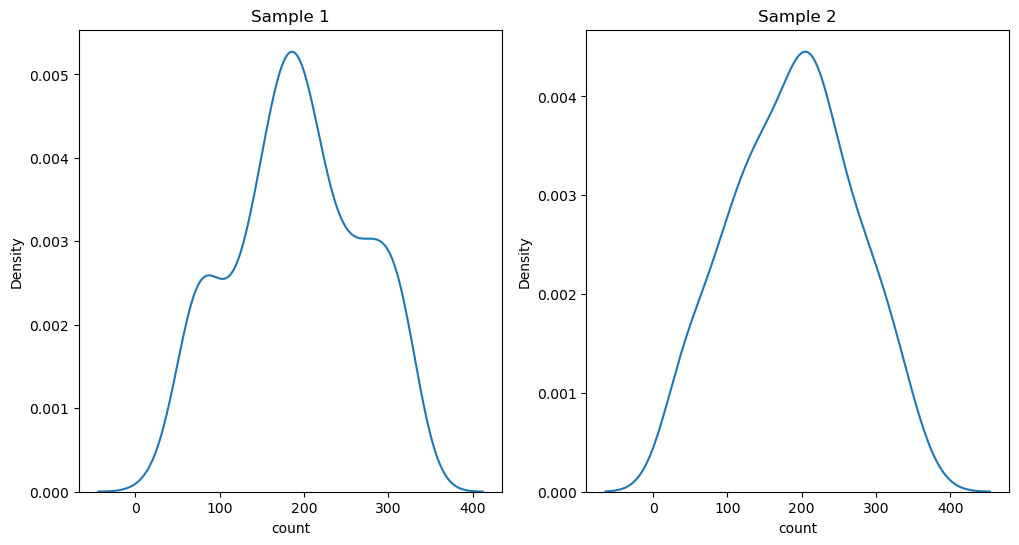

In [199]:
plot_dist([sample1, sample2])

Inference:
- Average no. of cycles rented during non holiday follows normal distribution
- Average no. of cycles rented during holiday doesn't follow normal distribution
- Distribution plot and QQ Plot confirms the above point

##### 5.1.2 Perform T-Test

In [200]:
alpha = 0.05
print('Sample-1 Mean: ', round(sample1.mean(),2), 'Sample-2 Mean: ', round(sample2.mean(),2))
tstat, p_value = ttest_ind(sample1, sample2, alternative='greater')
print('T-Stat: ', round(tstat,2), 'P-Val: ', p_value)
if p_value < 0.05:
    print('Reject Null Hypothesis. Hence, Average number of cycles rented during working day is greater than non working day')
else:
    print('Fail to Reject Null Hypothesis. Hence, Average number of cycles rented during working day is equal to non working day')

Sample-1 Mean:  192.28 Sample-2 Mean:  188.33
T-Stat:  0.51 P-Val:  0.30658555817068833
Fail to Reject Null Hypothesis. Hence, Average number of cycles rented during working day is equal to non working day


In [ ]:
Inference:

Since the test is between a numerical and categorical variable (with 2 categories), 2 sample t-test is selected
Alterate hypothesis is choosen as u1>u2 instead of u1<>u2
Fail to Reject Null Hypothesis. Hence, Average number of cycles rented during working day is equal to non working day

### 6. Problem Statement

No. of cycles rented similar or different in different temperature bins

***Solution Approach:***
- Null Hypothesis: **Average no. of cycles rented are equal for all temperature bins**
- Alternate Hypothesis: **Average no. of cycles rented is different for atleast one temperature bin**
- Comparison between Average no. of cycles rented (*Numerical*) and temperature bins (*Category with 4 categories*)
- **Normality Test**
    - Check for Average no. of cycles rented follow Normal distribution
    - **Shapiro Test**
- **Variance Test**
    - Check for Homogeneity of variances
    - **Levene Test**
- **One Way ANOVA Test**
- Significance level: 5%

In [209]:
count_temp = []
for item in list(data['temp_cat'].unique()):
    count_temp.append(list(data[data['temp_cat'] == item]['count']))

#### 6.1. Check for Assumptions

In [211]:
check_normality(count_temp)

Reject Null Hypothesis. Pval is  0.0 . Hence, Sample 1  doesn't follow normal distribution
Reject Null Hypothesis. Pval is  0.0 . Hence, Sample 2  doesn't follow normal distribution
Reject Null Hypothesis. Pval is  2.3293470155990732e-18 . Hence, Sample 3  doesn't follow normal distribution


C:\Users\Muthukumar\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


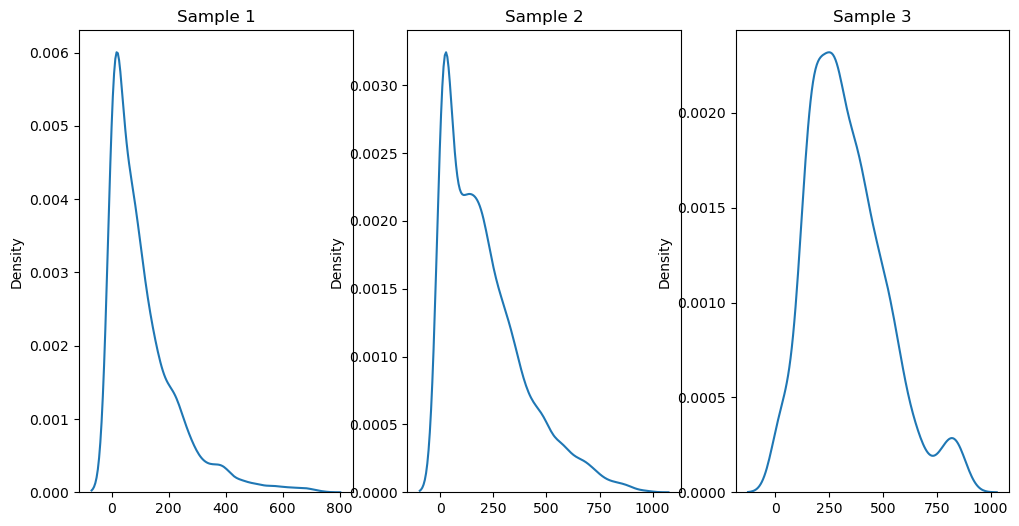

In [212]:
plot_dist(count_temp)

In [213]:
def Check_Variances_mod(samples):
    stat, p_value = levene(samples[0], samples[1], samples[2])
    if p_value < 0.05:
        print("Reject Null Hypothesis. Pval is ", p_value ,". Hence, the variance of atleast one sample is significantly different")
    else:
        print("Fail to Reject Null Hypothesis. Pval is ", round(p_value,2) ,". Hence, the variances are relatively equal across the samples")

In [214]:
Check_Variances_mod(count_temp)

Reject Null Hypothesis. Pval is  1.3487721880363727e-133 . Hence, the variance of atleast one sample is significantly different


Inference:
- For Anova, the assumptions are failed Normal distribution of sample data and homogeneity of variances
- Perform Anova and also try Kruskal wallis test

#### 6.2. Perform One Way Anova Test

In [215]:
# One Way Anova
alpha = 0.05
stat, p_value = f_oneway(count_temp[0], count_temp[1], count_temp[2])
#print('Sample-1 Mean: ', round(sample1.mean(),2), 'Sample-2 Mean: ', round(sample2.mean(),2))
print('Test Statistic: ', round(stat,2), 'P-Val: ', p_value)
if p_value < alpha:
    print('Reject Null Hypothesis. Hence, Average no. of cycles rented is different for atleast one temp bin')
else:
    print('Fail to Reject Null Hypothesis. Hence, Average no. of cycles rented is equal for all temp bins')

Test Statistic:  874.52 P-Val:  0.0
Reject Null Hypothesis. Hence, Average no. of cycles rented is different for atleast one season


Inference:
- One way Anova test concluded that Average number of cycles rented is significantly different for atleast one temperature bin
- In order the find the temperature where the Average number of cycles rented is significantly different we need to perform 2 sample t test

#### 6.3. Perform Kruskal Wallis Test

In [217]:
# Kruskal Wallis Test
alpha = 0.05
stat, p_value = kruskal(count_temp[0], count_temp[1], count_temp[2])
#print('Sample-1 Mean: ', round(sample1.mean(),2), 'Sample-2 Mean: ', round(sample2.mean(),2))
print('Test Statistic: ', round(stat,2), 'P-Val: ', p_value)
if p_value < alpha:
    print('Reject Null Hypothesis. Hence, Median no. of cycles rented is different for atleast one temp bin')
else:
    print('Fail to Reject Null Hypothesis. Hence, Median no. of cycles rented is equal for all temp bin')

Test Statistic:  1650.27 P-Val:  0.0
Reject Null Hypothesis. Hence, Median no. of cycles rented is different for atleast one temp bin


Inference:
- Since the assumptions of one way anova test is not met, the results can not concluded directly from that test
- Kruskal wallis test, concludes that the Median no. of cycles rented is different for atleast one temp bin

#### 6.4. Perform 2 Sample T Test between dependent and each independent variable

In [219]:
alpha = 0.05
for sample in count_temp:
    print('Average no. of cycles rented in season ', str(i), ': ', np.mean(sample))

for idx1, idx2 in list(combinations(np.arange(len(count_temp)),2)):
    tstat, p_value = ttest_ind(count_temp[idx1], count_temp[idx2], alternative='two-sided')
    print('T-Stat: ', round(tstat,2), 'P-Val: ', p_value)
    if p_value < 0.05:
        print('Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between temperature bin', str(idx1), ' and ', str(idx2))
    else:
        print('Fail to Reject Null Hypothesis. Hence, Average number of cycles rented is equal between temperature bin', str(idx1), ' and ', str(idx2))

Average no. of cycles rented in season  2 :  110.04892425582081
Average no. of cycles rented in season  2 :  207.43206913106096
Average no. of cycles rented in season  2 :  334.274115755627
T-Stat:  -27.46 P-Val:  6.882380020634517e-160
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between temperature bin 0  and  1
T-Stat:  -48.55 P-Val:  0.0
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between temperature bin 0  and  2
T-Stat:  -21.98 P-Val:  8.19521197158562e-104
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between temperature bin 1  and  2


Inference:
- Average number of cycles rented is significantly different between each temperature bins

### 7. Problem Statement

No. of cycles rented similar or different in different actual temperature bins

***Solution Approach:***
- Null Hypothesis: **Average no. of cycles rented are equal for all actual temperature bins**
- Alternate Hypothesis: **Average no. of cycles rented is different for atleast one actual temperature bin**
- Comparison between Average no. of cycles rented (*Numerical*) and actual temperature bins (*Category with 3 categories*)
- **Normality Test**
    - Check for Average no. of cycles rented follow Normal distribution
    - **Shapiro Test**
- **Variance Test**
    - Check for Homogeneity of variances
    - **Levene Test**
- **One Way ANOVA Test**
- Significance level: 5%

In [222]:
count_atemp = []
for item in list(data['atemp_cat'].unique()):
    count_atemp.append(list(data[data['atemp_cat'] == item]['count']))

#### 7.1. Check for Assumptions

In [223]:
check_normality(count_atemp)

Reject Null Hypothesis. Pval is  0.0 . Hence, Sample 1  doesn't follow normal distribution
Reject Null Hypothesis. Pval is  0.0 . Hence, Sample 2  doesn't follow normal distribution
Reject Null Hypothesis. Pval is  6.537652891420251e-31 . Hence, Sample 3  doesn't follow normal distribution


C:\Users\Muthukumar\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


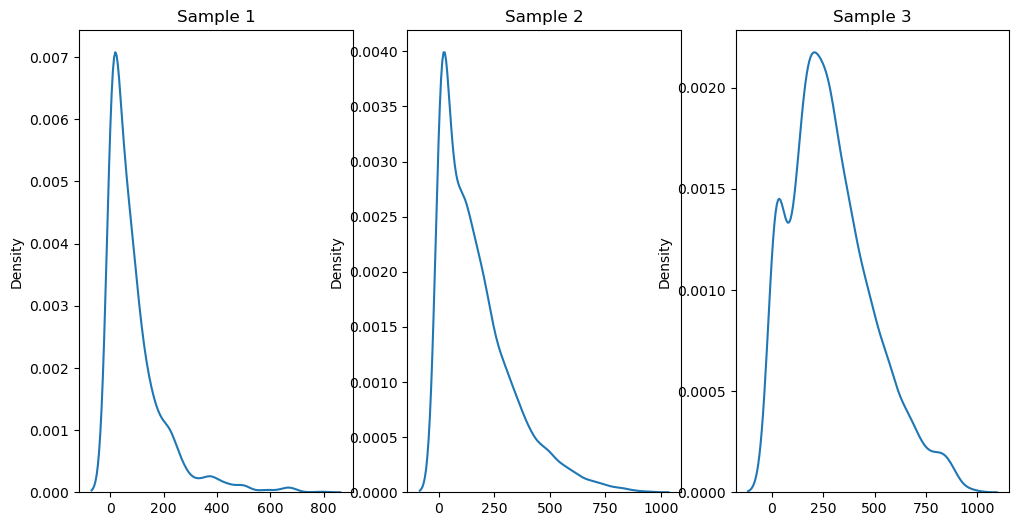

In [224]:
plot_dist(count_temp)

In [213]:
def Check_Variances_mod(samples):
    stat, p_value = levene(samples[0], samples[1], samples[2])
    if p_value < 0.05:
        print("Reject Null Hypothesis. Pval is ", p_value ,". Hence, the variance of atleast one sample is significantly different")
    else:
        print("Fail to Reject Null Hypothesis. Pval is ", round(p_value,2) ,". Hence, the variances are relatively equal across the samples")

In [225]:
Check_Variances_mod(count_atemp)

Reject Null Hypothesis. Pval is  2.2555487020783844e-150 . Hence, the variance of atleast one sample is significantly different


Inference:
- For Anova, the assumptions are failed Normal distribution of sample data and homogeneity of variances
- Perform Anova and also try Kruskal wallis test

#### 7.2. Perform One Way Anova Test

In [226]:
# One Way Anova
alpha = 0.05
stat, p_value = f_oneway(count_atemp[0], count_atemp[1], count_atemp[2])
#print('Sample-1 Mean: ', round(sample1.mean(),2), 'Sample-2 Mean: ', round(sample2.mean(),2))
print('Test Statistic: ', round(stat,2), 'P-Val: ', p_value)
if p_value < alpha:
    print('Reject Null Hypothesis. Hence, Average no. of cycles rented is different for atleast one temp bin')
else:
    print('Fail to Reject Null Hypothesis. Hence, Average no. of cycles rented is equal for all temp bins')

Test Statistic:  1008.35 P-Val:  0.0
Reject Null Hypothesis. Hence, Average no. of cycles rented is different for atleast one temp bin


Inference:
- One way Anova test concluded that Average number of cycles rented is significantly different for atleast one temperature bin
- In order the find the temperature where the Average number of cycles rented is significantly different we need to perform 2 sample t test

#### 7.3. Perform Kruskal Wallis Test

In [227]:
# Kruskal Wallis Test
alpha = 0.05
stat, p_value = kruskal(count_atemp[0], count_atemp[1], count_atemp[2])
#print('Sample-1 Mean: ', round(sample1.mean(),2), 'Sample-2 Mean: ', round(sample2.mean(),2))
print('Test Statistic: ', round(stat,2), 'P-Val: ', p_value)
if p_value < alpha:
    print('Reject Null Hypothesis. Hence, Median no. of cycles rented is different for atleast one temp bin')
else:
    print('Fail to Reject Null Hypothesis. Hence, Median no. of cycles rented is equal for all temp bin')

Test Statistic:  1846.6 P-Val:  0.0
Reject Null Hypothesis. Hence, Median no. of cycles rented is different for atleast one temp bin


Inference:
- Since the assumptions of one way anova test is not met, the results can not concluded directly from that test
- Kruskal wallis test, concludes that the Median no. of cycles rented is different for atleast one temp bin

#### 7.4. Perform 2 Sample T Test between dependent and each independent variable

In [228]:
alpha = 0.05
for sample in count_temp:
    print('Average no. of cycles rented in season ', str(i), ': ', np.mean(sample))

for idx1, idx2 in list(combinations(np.arange(len(count_atemp)),2)):
    tstat, p_value = ttest_ind(count_atemp[idx1], count_atemp[idx2], alternative='two-sided')
    print('T-Stat: ', round(tstat,2), 'P-Val: ', p_value)
    if p_value < 0.05:
        print('Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between temperature bin', str(idx1), ' and ', str(idx2))
    else:
        print('Fail to Reject Null Hypothesis. Hence, Average number of cycles rented is equal between temperature bin', str(idx1), ' and ', str(idx2))

Average no. of cycles rented in season  2 :  89.24617737003058
Average no. of cycles rented in season  2 :  169.62495593937257
Average no. of cycles rented in season  2 :  291.6686153846154
T-Stat:  -20.48 P-Val:  9.160970366148517e-91
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between temperature bin 0  and  1
T-Stat:  -41.34 P-Val:  0.0
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between temperature bin 0  and  2
T-Stat:  -31.41 P-Val:  1.8596348077188179e-205
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between temperature bin 1  and  2


Inference:
- Average number of cycles rented is significantly different between each actual temperature bins

### 8. Problem Statement

No. of cycles rented similar or different in different range of windspeed

***Solution Approach:***
- Null Hypothesis: **Average no. of cycles rented are equal for all range of windspeed**
- Alternate Hypothesis: **Average no. of cycles rented is different for atleast one range of windspeed**
- Comparison between Average no. of cycles rented (*Numerical*) and range of windspeed (*Category with 3 categories*)
- **Normality Test**
    - Check for Average no. of cycles rented follow Normal distribution
    - **Shapiro Test**
- **Variance Test**
    - Check for Homogeneity of variances
    - **Levene Test**
- **One Way ANOVA Test**
- Significance level: 5%

In [237]:
count_ws = []
for item in list(data['windspeed_cat'].dropna().unique()):
    count_ws.append(list(data[data['windspeed_cat'] == item]['count']))

In [238]:
for i in range(len(count_ws)):
    print(len(count_ws[i]))

3026
5698
849


In [236]:
data['windspeed_cat'].dropna().unique()

['Low', 'Med', 'High']
Categories (3, object): ['Low' < 'Med' < 'High']

#### 8.1. Check for Assumptions

In [239]:
check_normality(count_ws)

Reject Null Hypothesis. Pval is  0.0 . Hence, Sample 1  doesn't follow normal distribution
Reject Null Hypothesis. Pval is  0.0 . Hence, Sample 2  doesn't follow normal distribution
Reject Null Hypothesis. Pval is  6.79376919669305e-23 . Hence, Sample 3  doesn't follow normal distribution


C:\Users\Muthukumar\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


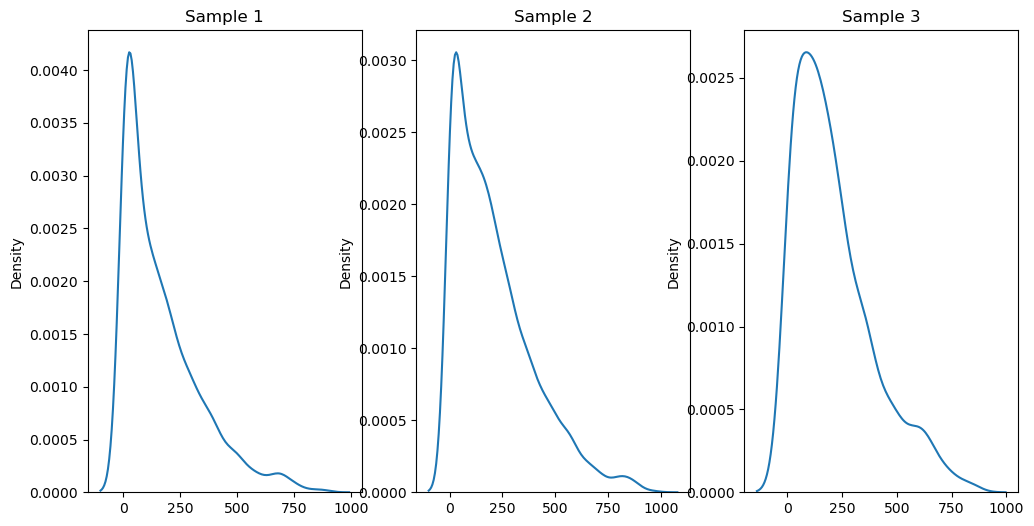

In [240]:
plot_dist(count_ws)

In [241]:
Check_Variances_mod(count_ws)

Reject Null Hypothesis. Pval is  1.1009171815057205e-08 . Hence, the variance of atleast one sample is significantly different


Inference:
- For Anova, the assumptions are failed Normal distribution of sample data and homogeneity of variances
- Perform Anova and also try Kruskal wallis test

#### 8.2. Perform One Way Anova Test

In [243]:
# One Way Anova
alpha = 0.05
stat, p_value = f_oneway(count_ws[0], count_ws[1], count_ws[2])
#print('Sample-1 Mean: ', round(sample1.mean(),2), 'Sample-2 Mean: ', round(sample2.mean(),2))
print('Test Statistic: ', round(stat,2), 'P-Val: ', p_value)
if p_value < alpha:
    print('Reject Null Hypothesis. Hence, Average no. of cycles rented is different for atleast one windspeed range')
else:
    print('Fail to Reject Null Hypothesis. Hence, Average no. of cycles rented is equal for all windspeed ranges')

Test Statistic:  61.49 P-Val:  2.9212488566229153e-27
Reject Null Hypothesis. Hence, Average no. of cycles rented is different for atleast windspeed range


Inference:
- One way Anova test concluded that Average number of cycles rented is significantly different for atleast one windspeed range
- In order the find the windspeed range where the Average number of cycles rented is significantly different we need to perform 2 sample t test

#### 8.3. Perform Kruskal Wallis Test

In [244]:
# Kruskal Wallis Test
alpha = 0.05
stat, p_value = kruskal(count_ws[0], count_ws[1], count_ws[2])
#print('Sample-1 Mean: ', round(sample1.mean(),2), 'Sample-2 Mean: ', round(sample2.mean(),2))
print('Test Statistic: ', round(stat,2), 'P-Val: ', p_value)
if p_value < alpha:
    print('Reject Null Hypothesis. Hence, Median no. of cycles rented is different for atleast one windspeed range')
else:
    print('Fail to Reject Null Hypothesis. Hence, Median no. of cycles rented is equal for all windspeed ranges')

Test Statistic:  146.64 P-Val:  1.4350374917697305e-32
Reject Null Hypothesis. Hence, Median no. of cycles rented is different for atleast one windspeed range


Inference:
- Since the assumptions of one way anova test is not met, the results can not concluded directly from that test
- Kruskal wallis test, concludes that the Median no. of cycles rented is different for atleast one windspeed range

#### 8.4. Perform 2 Sample T Test between dependent and each independent variable

In [245]:
alpha = 0.05
for sample in count_ws:
    print('Average no. of cycles rented in season ', str(i), ': ', np.mean(sample))

for idx1, idx2 in list(combinations(np.arange(len(count_ws)),2)):
    tstat, p_value = ttest_ind(count_ws[idx1], count_ws[idx2], alternative='two-sided')
    print('T-Stat: ', round(tstat,2), 'P-Val: ', p_value)
    if p_value < 0.05:
        print('Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between windspeed range', str(idx1), ' and ', str(idx2))
    else:
        print('Fail to Reject Null Hypothesis. Hence, Average number of cycles rented is equal between windspeed range', str(idx1), ' and ', str(idx2))

Average no. of cycles rented in season  2 :  165.66027759418375
Average no. of cycles rented in season  2 :  209.1123201123201
Average no. of cycles rented in season  2 :  213.35689045936397
T-Stat:  -10.68 P-Val:  1.9179099323170704e-26
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between windspeed range 0  and  1
T-Stat:  -7.17 P-Val:  8.740907653897123e-13
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between windspeed range 0  and  2
T-Stat:  -0.62 P-Val:  0.5352388697851858
Fail to Reject Null Hypothesis. Hence, Average number of cycles rented is equal between windspeed range 1  and  2


Inference:
- Average number of cycles rented is significantly different between windspeed range 0  and  1 &  windspeed range 0  and  2
- Average number of cycles rented is significantly equal between windspeed range 1  and  2

### 9. Problem Statement

No. of cycles rented similar or different in different humidity levels

***Solution Approach:***
- Null Hypothesis: **Average no. of cycles rented are equal for all humidity levels**
- Alternate Hypothesis: **Average no. of cycles rented is different for atleast one humidity level**
- Comparison between Average no. of cycles rented (*Numerical*) and humidity levels (*Category with 3 categories*)
- **Normality Test**
    - Check for Average no. of cycles rented follow Normal distribution
    - **Shapiro Test**
- **Variance Test**
    - Check for Homogeneity of variances
    - **Levene Test**
- **One Way ANOVA Test**
- Significance level: 5%

In [246]:
count_humidity = []
for item in list(data['humidity_cat'].dropna().unique()):
    count_humidity.append(list(data[data['humidity_cat'] == item]['count']))

#### 9.1. Check for Assumptions

In [249]:
check_normality(count_humidity)

Reject Null Hypothesis. Pval is  0.0 . Hence, Sample 1  doesn't follow normal distribution
Reject Null Hypothesis. Pval is  4.90454462513686e-44 . Hence, Sample 2  doesn't follow normal distribution
Reject Null Hypothesis. Pval is  1.0363253878974854e-24 . Hence, Sample 3  doesn't follow normal distribution


C:\Users\Muthukumar\AppData\Roaming\Python\Python311\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


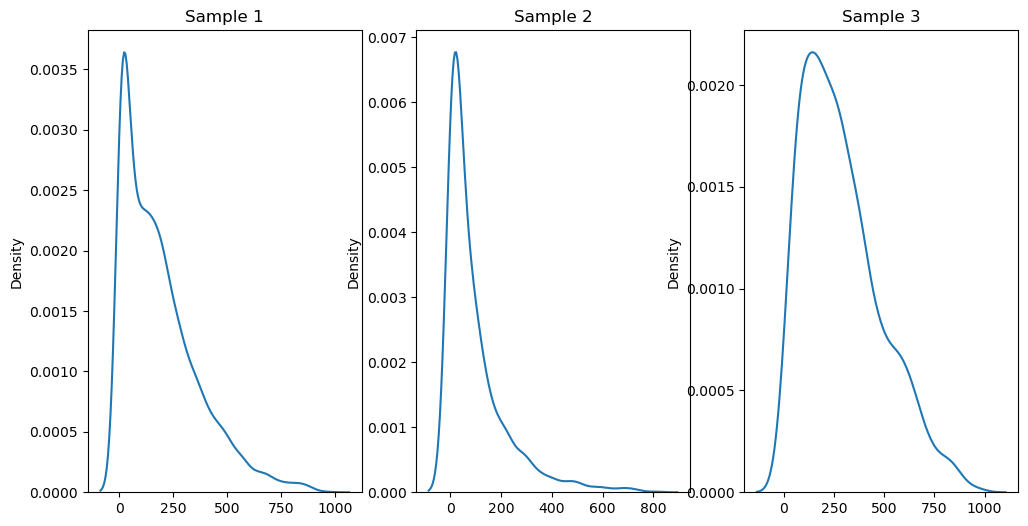

In [250]:
plot_dist(count_humidity)

In [241]:
Check_Variances_mod(count_ws)

Reject Null Hypothesis. Pval is  1.1009171815057205e-08 . Hence, the variance of atleast one sample is significantly different


Inference:
- For Anova, the assumptions are failed Normal distribution of sample data and homogeneity of variances
- Perform Anova and also try Kruskal wallis test

#### 9.2. Perform One Way Anova Test

In [251]:
# One Way Anova
alpha = 0.05
stat, p_value = f_oneway(count_humidity[0], count_humidity[1], count_humidity[2])
#print('Sample-1 Mean: ', round(sample1.mean(),2), 'Sample-2 Mean: ', round(sample2.mean(),2))
print('Test Statistic: ', round(stat,2), 'P-Val: ', p_value)
if p_value < alpha:
    print('Reject Null Hypothesis. Hence, Average no. of cycles rented is different for atleast one humidity level')
else:
    print('Fail to Reject Null Hypothesis. Hence, Average no. of cycles rented is equal for all humidity levels')

Test Statistic:  482.02 P-Val:  2.741782831381464e-201
Reject Null Hypothesis. Hence, Average no. of cycles rented is different for atleast one humidity level


Inference:
- One way Anova test concluded that Average number of cycles rented is significantly different for atleast one humidity level
- In order the find the humidity level where the Average number of cycles rented is significantly different we need to perform 2 sample t test

#### 9.3. Perform Kruskal Wallis Test

In [252]:
# Kruskal Wallis Test
alpha = 0.05
stat, p_value = kruskal(count_humidity[0], count_humidity[1], count_humidity[2])
#print('Sample-1 Mean: ', round(sample1.mean(),2), 'Sample-2 Mean: ', round(sample2.mean(),2))
print('Test Statistic: ', round(stat,2), 'P-Val: ', p_value)
if p_value < alpha:
    print('Reject Null Hypothesis. Hence, Median no. of cycles rented is different for atleast one humidity level')
else:
    print('Fail to Reject Null Hypothesis. Hence, Median no. of cycles rented is equal for all humidity levels')

Test Statistic:  1061.6 P-Val:  2.996871369661641e-231
Reject Null Hypothesis. Hence, Median no. of cycles rented is different for atleast one humidity level


Inference:
- Since the assumptions of one way anova test is not met, the results can not concluded directly from that test
- Kruskal wallis test, concludes that the Median no. of cycles rented is different for atleast one humidity level

#### 9.4. Perform 2 Sample T Test between dependent and each independent variable

In [253]:
alpha = 0.05
for sample in count_humidity:
    print('Average no. of cycles rented in season ', str(i), ': ', np.mean(sample))

for idx1, idx2 in list(combinations(np.arange(len(count_humidity)),2)):
    tstat, p_value = ttest_ind(count_humidity[idx1], count_humidity[idx2], alternative='two-sided')
    print('T-Stat: ', round(tstat,2), 'P-Val: ', p_value)
    if p_value < 0.05:
        print('Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between humidity level', str(idx1), ' and ', str(idx2))
    else:
        print('Fail to Reject Null Hypothesis. Hence, Average number of cycles rented is equal between humidity level', str(idx1), ' and ', str(idx2))

Average no. of cycles rented in season  2 :  190.4756966947505
Average no. of cycles rented in season  2 :  96.85192433137638
Average no. of cycles rented in season  2 :  288.89789603960395
T-Stat:  19.78 P-Val:  2.358356748074402e-85
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between humidity level 0  and  1
T-Stat:  -19.93 P-Val:  1.3306807309895657e-86
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between humidity level 0  and  2
T-Stat:  -32.53 P-Val:  2.174595591792677e-200
Reject Null Hypothesis. Hence, Average number of cycles rented is significantly different between humidity level 1  and  2


Inference:
- Average number of cycles rented is significantly different between each humidity levels

### 10. Problem Statement

Check for dependecy between each categorical features

***Solution Approach:***
- Null Hypothesis: **Categorical variables are independent**
- Alternate Hypothesis: **Categorical variables are dependent**
- **Chi-square Independency Test**
- Significance level: 5%

In [270]:
cat_features = ['season', 'workingday', 'weather', 'temp_cat', 'atemp_cat', 'humidity_cat', 'windspeed_cat']
df = pd.DataFrame(data = np.ones((len(cat_features),len(cat_features))) * -1, columns = cat_features, index=cat_features)
for idx1, idx2 in list(combinations(cat_features,2)):
    contigency_table = pd.crosstab(data[idx1], data[idx2])
    stat, p_value, a, exp = chi2_contingency(contigency_table)
    print('Stat: ', round(stat,2), 'P-Val: ', p_value)
    if p_value < 0.05:
        print('Reject Null Hypothesis. Hence, ', str(idx1), ' and ', str(idx2), 'are dependent')
    else:
        print('Fail to Reject Null Hypothesis. Hence, ', str(idx1), ' and ', str(idx2), 'are independent')
    df.loc[idx1, idx2] = round(p_value,2)
    df.loc[idx2, idx1] = round(p_value,2)

Stat:  2.57 P-Val:  0.4626148207703564
Fail to Reject Null Hypothesis. Hence,  season  and  workingday are independent
Stat:  49.16 P-Val:  1.549925073686492e-07
Reject Null Hypothesis. Hence,  season  and  weather are dependent
Stat:  5897.24 P-Val:  0.0
Reject Null Hypothesis. Hence,  season  and  temp_cat are dependent
Stat:  6630.76 P-Val:  0.0
Reject Null Hypothesis. Hence,  season  and  atemp_cat are dependent
Stat:  441.6 P-Val:  3.154697752402428e-92
Reject Null Hypothesis. Hence,  season  and  humidity_cat are dependent
Stat:  191.15 P-Val:  1.4477127726644647e-38
Reject Null Hypothesis. Hence,  season  and  windspeed_cat are dependent
Stat:  16.16 P-Val:  0.0010502165960627732
Reject Null Hypothesis. Hence,  workingday  and  weather are dependent
Stat:  9.57 P-Val:  0.008342423420746568
Reject Null Hypothesis. Hence,  workingday  and  temp_cat are dependent
Stat:  9.73 P-Val:  0.0077190014112448494
Reject Null Hypothesis. Hence,  workingday  and  atemp_cat are dependent
Stat:

<Axes: >

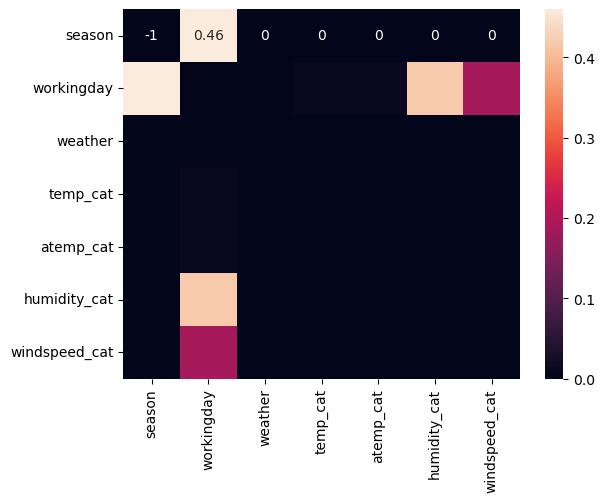

In [273]:
sns.heatmap(df, vmin = 0, annot=True)

Inference:
- In the above heatmap dark indicates dependency (pval~0) and light color indicates independency (pval >0)
- It is evident that almost all the categorical features are dependent except working day

# Business Insights and Recommendations